In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import os
import sys

In [3]:
import jax
from housemaze import maze
from housemaze import utils
from housemaze import renderer
from housemaze.human_dyna import utils as dyna_utils
from housemaze.human_dyna import mazes

from functools import partial
from housemaze.human_dyna import experiments as housemaze_experiments
import os.path
import matplotlib.pyplot as plt
import numpy as np

No file specified for groups.
Using: /Users/wilka/git/research/human-dyna-web/libraries/housemaze/housemaze/human_dyna/list_of_groups.npy
No file specified for image dict.
Using: /Users/wilka/git/research/human-dyna-web/libraries/housemaze/housemaze/image_data.pkl
Compiling jax environment functions.
	time: 1.3777439594268799
Compiling multi-render function.
	time: 0.06307411193847656


# Manipulation 1:

## shortcut

 A shortcut is introduced.

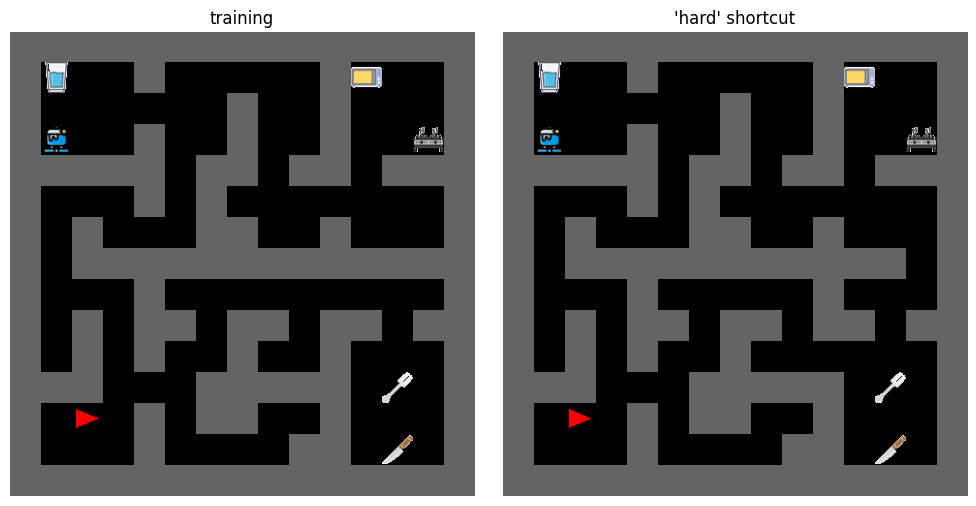

# Manipulation 2:

## faster when on-path but further than off-path but closer

 
    In both tests, a shortcut is introduced. In the first, the agent is tested on the same path it trained on. In the second, the agent is tested on a different path.
    

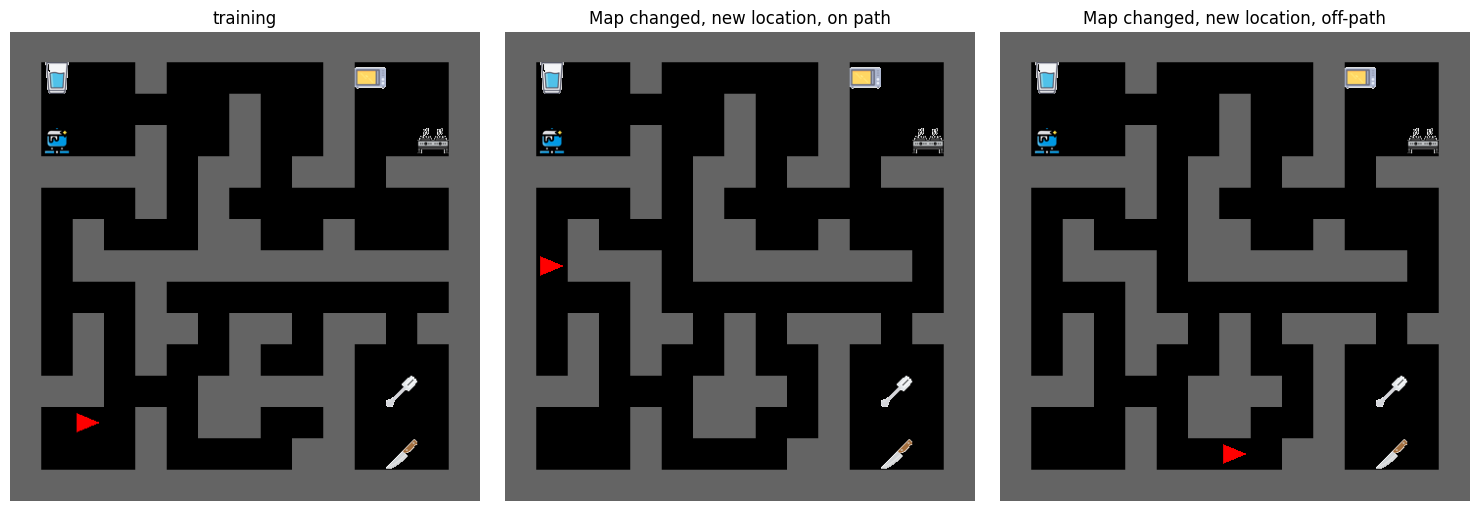

# Manipulation 3:

## reusing longer of two paths matching training path

 
    Here there are two paths to the test object. We predict that people will take the path that was used to get to the training object.
    

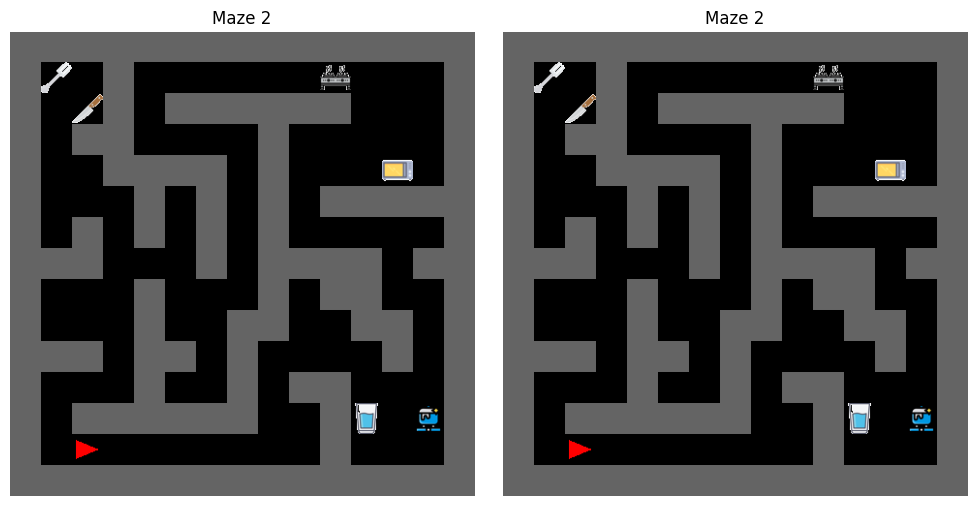

# Manipulation 4:

## probing for planning near goal

 At test time, we'll change the location of the off-task object so it's equidistant from path during training.
        

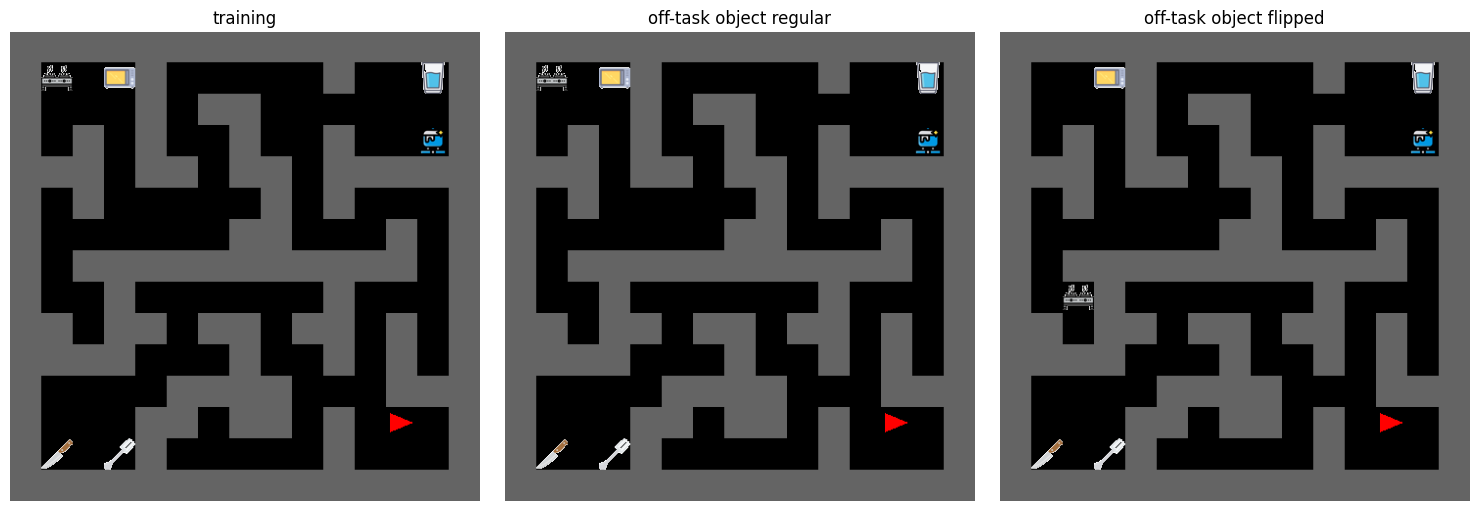

In [8]:
from IPython.display import display, Markdown
from nicewebrl import stages as nice_stages

import matplotlib.pyplot as plt
import experiment_1 as experiment

def create_env_stage_figure(env_stages):
    num_stages = len(env_stages)
    fig, axes = plt.subplots(1, num_stages, figsize=(5*num_stages, 5))
    
    if num_stages == 1:
        axes = [axes]  # Make axes iterable if there's only one subplot
    
    rng = jax.random.PRNGKey(42)
    
    for ax, stage in zip(axes, env_stages):
        timestep = stage.web_env.reset(rng, stage.env_params)
        image = experiment.render_fn(timestep)
        
        ax.imshow(image)
        ax.axis('off')
        ax.set_title(stage.metadata.get('desc', None) or stage.name, wrap=True)
    
    plt.tight_layout()
    return fig


for block in experiment.all_blocks[2:]:
    display(Markdown(f"# Manipulation {block.metadata['manipulation']}:"))
    display(Markdown(f"## {block.metadata['desc']}"))
    display(Markdown(f" {block.metadata.get('long')}"))
    env_stages = [stage for stage in block.stages if isinstance(stage, nice_stages.EnvStage)]
    # [print(stage.metadata) for stage in block.stages]
    create_env_stage_figure(env_stages)
    plt.show()
